# PCA (principle componets analysis)
pca apply karne se pahle aapko data ko scale karna hoga standardscaler se

n_componets means diye gaye dimention ko n dimension me convert karega

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer=load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:

print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
dt=pd.DataFrame(cancer.data,columns=cancer.feature_names)
dt['target']=cancer.target

In [8]:
dt.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
dt.shape

(569, 31)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x_scaled=sc.fit_transform(dt)

In [13]:
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461, -1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999, -1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121, -1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.77060855]])

In [14]:
from sklearn.decomposition import PCA

In [15]:

pca=PCA(n_components=2,random_state=0)

In [16]:
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
x_pca=pca.transform(x_scaled)

In [18]:
x_scaled.shape,x_pca.shape

((569, 31), (569, 2))

In [19]:
# or

In [20]:
xpca=pca.fit_transform(x_scaled)
xpca

array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       ...,
       [ 1.53007727, -1.95887148],
       [10.40500789,  1.84907792],
       [-5.50486158, -0.76634841]])

In [21]:
xpca.shape

(569, 2)

Text(0,0.5,'second principle component')

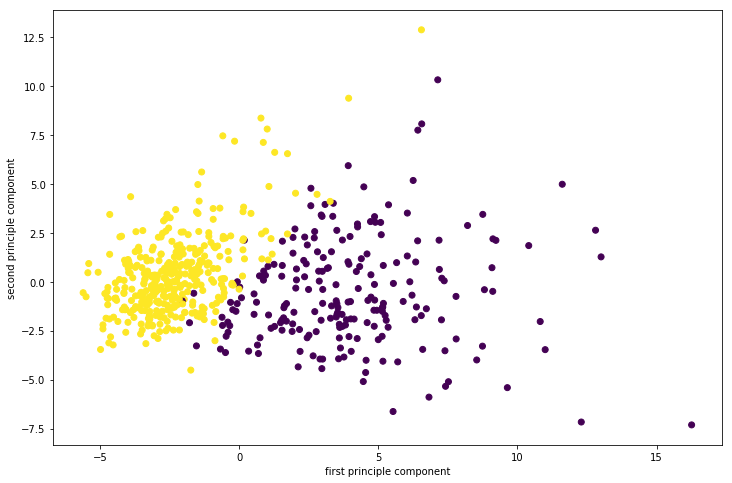

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer.target,cmap='viridis')
plt.xlabel('first principle component')
plt.ylabel('second principle component')


In [23]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

In [24]:
pca.explained_variance_ratio_

array([0.44896035, 0.18472104])

<BarContainer object of 20 artists>

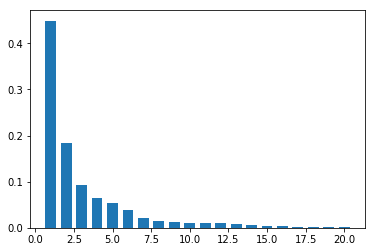

In [57]:
pca=PCA(n_components=20,random_state=0)
x_pca=pca.fit_transform(x_scaled)
variance=pca.explained_variance_ratio_
plt.bar(x=range(1,len(variance)+1),height=variance,width=0.7)

In [58]:
variance

array([0.44896035, 0.18472104, 0.09183385, 0.06446333, 0.05351866,
       0.03895187, 0.02208771, 0.0156405 , 0.01344822, 0.01131915,
       0.00983405, 0.00938664, 0.00841969, 0.0068476 , 0.00479278,
       0.00284395, 0.00257613, 0.00190437, 0.00166006, 0.00155535])

In [25]:
principal_df=pd.DataFrame(x_pca,columns=['principal componet 1','principal component 2'])

In [29]:
principal_df.head()

,principal componet 1,principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 